In [ ]:
# !python3 -m pip install --user neo elephant viziphant

# SPADE tutorial


In [1]:
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
np.random.seed(4542)

## Generate synfire data

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]



IPython CPU timings (estimated):
  User   :       5.37 s.
  System :       0.74 s.
Wall time:      32.96 s.


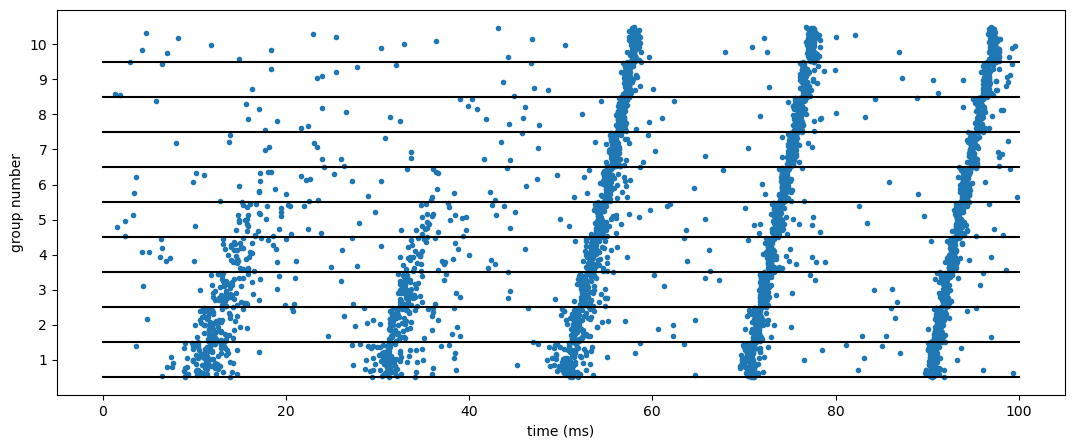

In [2]:
%run -int Diesmann_et_al_1999.py

In [5]:
Mgp.t/ms


array([ 1.3,  1.5,  1.9, ..., 99.4, 99.6, 99.8])

In [27]:
from neo.core import SpikeTrain
spiketrains = []
brain_spiketrains = Mgp.spike_trains()
for i_spiketrain in brain_spiketrains.keys():
    spiketrains.append(SpikeTrain(brain_spiketrains[i_spiketrain]/ms*pq.ms, t_stop=duration/ms*pq.ms))


In [28]:
i_spiketrain

999

In [29]:
brain_spiketrains[i_spiketrain]/ms*pq.ms

array([58. , 76.8, 97. ]) * ms

In [30]:
print("spiketrain_0 type is", type(spiketrains[0]))
print("spiketrains_last type is", type(spiketrains[-1]))

spiketrain_0 type is <class 'neo.core.spiketrain.SpikeTrain'>
spiketrains_last type is <class 'neo.core.spiketrain.SpikeTrain'>


In [31]:
print(f"spiketrain_0 has {len(spiketrains[0])} spikes:")
print("  t_start:", spiketrains[0].t_start)
print("  t_stop:", spiketrains[0].t_stop)
print("  spike times:", spiketrains[0].times)

spiketrain_0 has 5 spikes:
  t_start: 0.0 ms
  t_stop: 100.0 ms
  spike times: [13.9 34.1 51.9 71.  90.5] ms


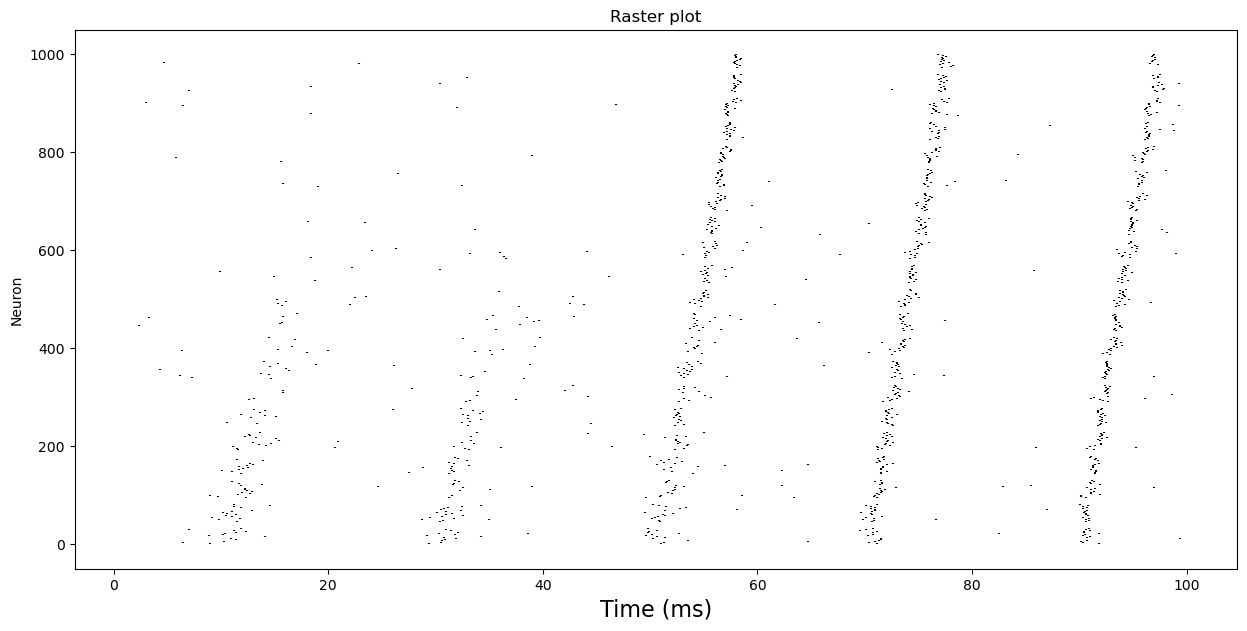

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))
ax.eventplot([spiketrains[i].magnitude for i in range(len(spiketrains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

## Mining patterns with SPADE 

In [36]:
#elephant.spade.spade?

Signature:
elephant.spade.spade(
    spiketrains,
    bin_size,
    winlen,
    min_spikes=2,
    min_occ=2,
    max_spikes=None,
    max_occ=None,
    min_neu=1,
    approx_stab_pars=None,
    n_surr=0,
    dither=array(15.) * ms,
    spectrum='#',
    alpha=None,
    stat_corr='fdr_bh',
    surr_method='dither_spikes',
    psr_param=None,
    output_format='patterns',
    **surr_kwargs,
)
Docstring:
Perform the SPADE :cite:`spade-Torre2013_132`,
:cite:`spade-Quaglio2017_41`, :cite:`spade-Stella2019_104022` analysis for
the parallel input `spiketrains`. They are discretized with a temporal
resolution equal to `bin_size` in a sliding window of `winlen*bin_size`.

First, spike patterns are mined from the `spiketrains` using a technique
called frequent itemset mining (FIM) or formal concept analysis (FCA). In
this framework, a particular spatio-temporal spike pattern is called a
"concept". It is then possible to compute the stability and the p-value
of all pattern candidates. In a final 

In [48]:
import pickle
filename = 'patterns.pkl'

if os.path.isfile(filename):
    with open(filename, 'rb') as f:
        patterns = pickle.load(f)
else:
    patterns = elephant.spade.spade(
        spiketrains=spiketrains, binsize=1*pq.ms, winlen=1, min_spikes=3,
        n_surr=100,dither=5*pq.ms,
        psr_param=[0,0,0],
        output_format='patterns')['patterns']

    with open(filename, 'wb') as f:
        pickle.dump(patterns, f)

In [49]:
patterns

[{'itemset': (864, 514, 940, 895),
  'windows_ids': (57, 99),
  'neurons': [864, 514, 940, 895],
  'lags': array([0., 0., 0.]) * ms,
  'times': array([57., 99.]) * ms,
  'signature': (4, 2),
  'pvalue': 1.0},
 {'itemset': (856, 762, 844),
  'windows_ids': (98, 76),
  'neurons': [856, 762, 844],
  'lags': array([0., 0.]) * ms,
  'times': array([76., 98.]) * ms,
  'signature': (3, 2),
  'pvalue': 1.0},
 {'itemset': (675, 636, 763),
  'windows_ids': (98, 75),
  'neurons': [675, 636, 763],
  'lags': array([0., 0.]) * ms,
  'times': array([75., 98.]) * ms,
  'signature': (3, 2),
  'pvalue': 1.0},
 {'itemset': (966, 844, 914, 856, 831),
  'windows_ids': (57, 98),
  'neurons': [966, 844, 914, 856, 831],
  'lags': array([0., 0., 0., 0.]) * ms,
  'times': array([57., 98.]) * ms,
  'signature': (5, 2),
  'pvalue': 1.0},
 {'itemset': (963, 970, 912, 917, 918),
  'windows_ids': (97, 78),
  'neurons': [963, 970, 912, 917, 918],
  'lags': array([0., 0., 0., 0.]) * ms,
  'times': array([78., 97.]) * 

In [85]:
viziphant.patterns.plot_patterns??

Signature:
viziphant.patterns.plot_patterns(
    spiketrains,
    patterns,
    circle_sizes=(3, 50, 70),
    colors=None,
)
Source:   
def plot_patterns(spiketrains, patterns, circle_sizes=(3, 50, 70),
                  colors=None):
    """
    Raster plot with one or more chosen SPADE or CAD patterns ot top shown in
    color.

    Overlapping patterns (patterns that share neurons at a particular spike
    time) are represented as pie charts of individual pattern colors.

    Parameters
    ----------
    spiketrains : list of neo.SpikeTrain
        List of spike trains that were used as the input.
    patterns : dict or list of dict
        One or more patterns from a list of found patterns returned by
        :func:`elephant.spade.spade` or
        :func:`elephant.cell_assembly_detection.cell_assembly_detection`
        pattern detectors.
    circle_sizes : tuple of float, optional
        A tuple of 3 elements:
          1) raster plot neurons size that don't participate in the p

In [39]:
viziphant.patterns.plot_patterns?

Signature:
viziphant.patterns.plot_patterns(
    spiketrains,
    patterns,
    circle_sizes=(3, 50, 70),
    colors=None,
)
Docstring:
Raster plot with one or more chosen SPADE or CAD patterns ot top shown in
color.

Overlapping patterns (patterns that share neurons at a particular spike
time) are represented as pie charts of individual pattern colors.

Parameters
----------
spiketrains : list of neo.SpikeTrain
    List of spike trains that were used as the input.
patterns : dict or list of dict
    One or more patterns from a list of found patterns returned by
    :func:`elephant.spade.spade` or
    :func:`elephant.cell_assembly_detection.cell_assembly_detection`
    pattern detectors.
circle_sizes : tuple of float, optional
    A tuple of 3 elements:
      1) raster plot neurons size that don't participate in the patterns;

      2) patterns circle size;

      3) pie chart (overlapped patterns) size.

    Default: (3, 50, 70)
colors : list of str or None
    A user-defined list of 

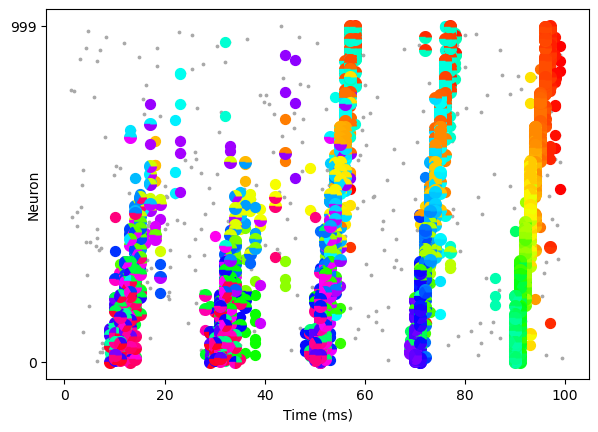

In [42]:
#fig, ax = plt.subplots()
ax = viziphant.patterns.plot_patterns(spiketrains, patterns)
fig = ax.get_figure()
fig.set_figwidth(13)
fig.set_figwidth(7)


In [43]:
%matplotlib inline

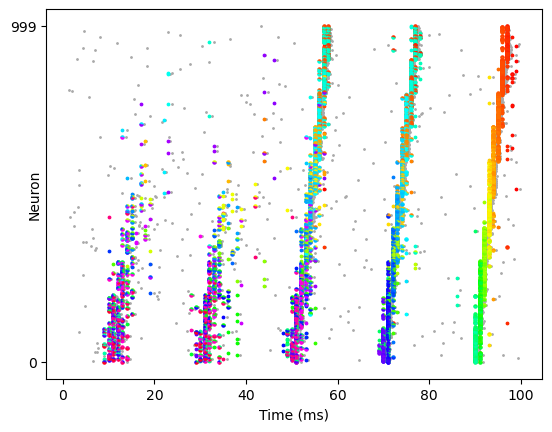

In [54]:
ax = viziphant.patterns.plot_patterns(spiketrains, patterns, circle_sizes=(.1, .3, .5))


In [59]:
fig = ax.get_figure()
fig.set_figwidth(13)
fig.set_figheight(5)
fig.savefig('../figures/Diesmann_et_al_1999_spade.pdf', bbox_inches='tight', pad_inches=0.0, backend='pdf')


In [ ]:
plt.gcf().set_size_inches(13, 5)
fig.savefig('../figures/Diesmann_et_al_1999_spade.pdf', bbox_inches='tight', pad_inches=0.0, backend='pdf')

In [55]:
len(patterns)

253

In [ ]:

plt.savefig('../figures/Diesmann_et_al_1999_spade.pdf', bbox_inches='tight', pad_inches=0.0, backend='pdf')


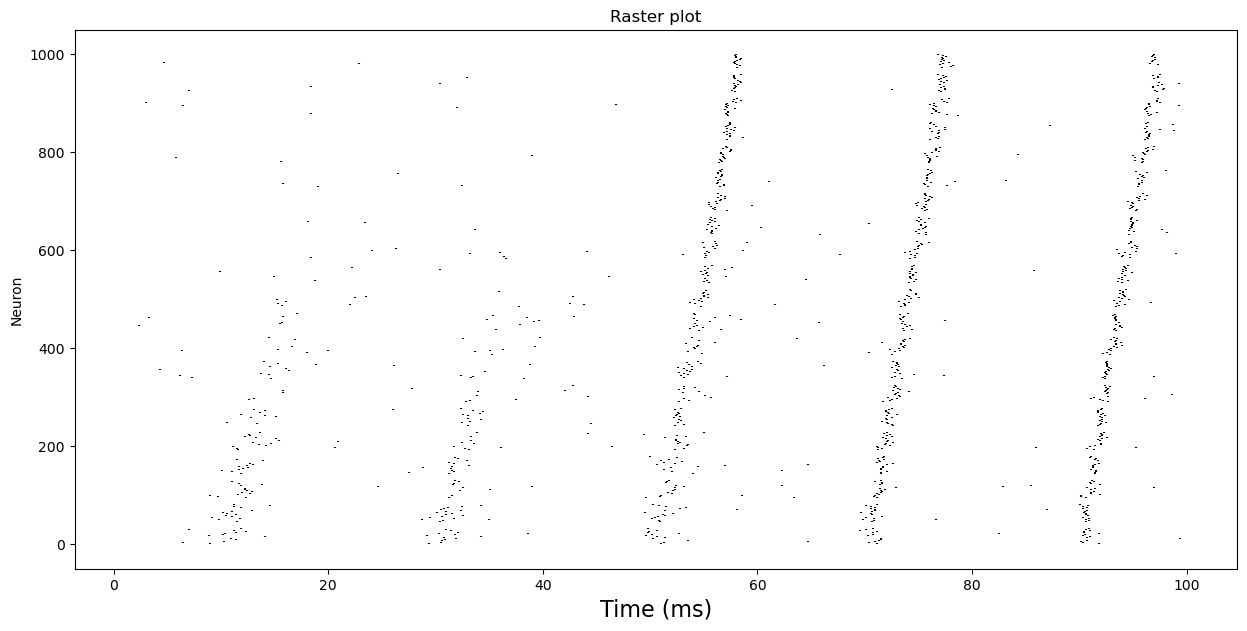

In [ ]:
figure(figsize=(13, 5))
plot(Mgp.t/ms, 1.0*Mgp.i/group_size, '.')
plot([0, duration/ms], np.arange(n_groups).repeat(2).reshape(-1, 2).T, 'k-')
ylabel('group number')
yticks(np.arange(n_groups)+.5, labels=range(1, n_groups+1))
xlabel('time (ms)')

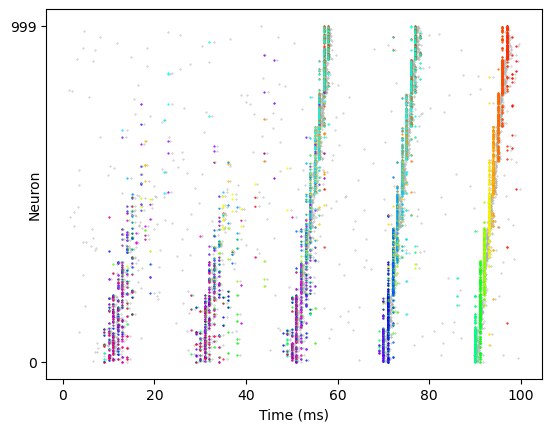

In [80]:
ax = viziphant.patterns.plot_patterns(spiketrains, patterns, circle_sizes=(.1, .3, .5))


In [92]:
fig = ax.get_figure()
fig.set_figwidth(13)
fig.set_figheight(5)
# fig.subplots_adjust(left=.25)
ax.plot([0, duration/ms], 100*np.arange(n_groups).repeat(2).reshape(-1, 2).T, 'k-')
ax.set_yticks(100*np.arange(n_groups)+.5, labels=range(1, n_groups+1))
ax.set_ylabel('group number')#, labelpad=15)
# fig.tight_layout(pad=.1)
ax.yaxis.set_label_coords(-0.035, 0.5)
fig.savefig('../figures/Diesmann_et_al_1999_spade.pdf', bbox_inches='tight', pad_inches=0.0, backend='pdf')

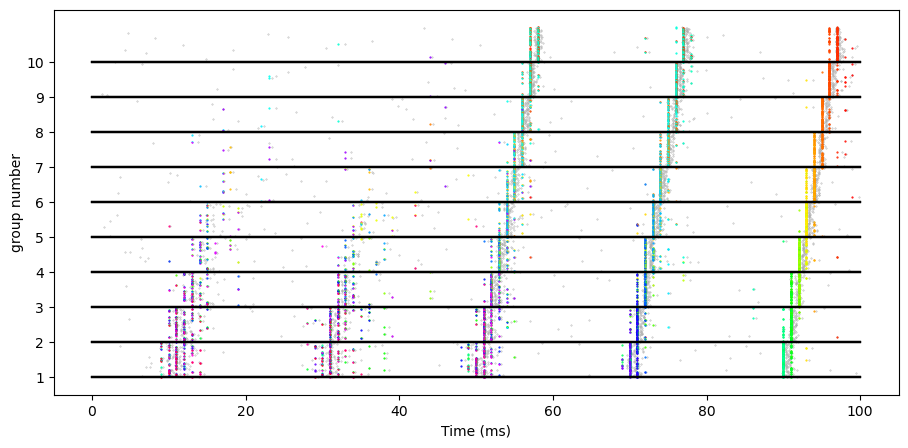

In [93]:
fig